In [1]:
from rdatasets import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
titanic = data("carData", "TitanicSurvival")


In [3]:
titanic


,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [4]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        1309 non-null   object 
 1   sex             1309 non-null   object 
 2   age             1046 non-null   float64
 3   passengerClass  1309 non-null   object 
dtypes: float64(1), object(3)
memory usage: 41.0+ KB


# Tabelas de Frequência

In [5]:
pd.crosstab(index=titanic["survived"], columns="count", margins=True).drop(
    columns=["All"]
)


col_0,count
survived,
no,809
yes,500
All,1309


In [6]:
titanic_class = pd.crosstab(
    index=titanic["survived"], columns=titanic["passengerClass"], margins=True
)


In [7]:
titanic_class


passengerClass,1st,2nd,3rd,All
survived,,,,
no,123,158,528,809
yes,200,119,181,500
All,323,277,709,1309


In [8]:
titanic_class / titanic_class.loc["All"]


passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.380805,0.570397,0.744711,0.618029
yes,0.619195,0.429603,0.255289,0.381971
All,1.000000,1.000000,1.000000,1.000000


In [9]:
titanic_class.div(titanic_class["All"], axis=0)


passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.152040,0.195303,0.652658,1.0
yes,0.400000,0.238000,0.362000,1.0
All,0.246753,0.211612,0.541635,1.0


In [10]:
titanic_sex = pd.crosstab(
    index=titanic["survived"], columns=titanic["sex"], margins=True
)


In [11]:
titanic_sex


sex,female,male,All
survived,,,
no,127,682,809
yes,339,161,500
All,466,843,1309


In [12]:
titanic_sex / titanic_sex.loc["All"]


sex,female,male,All
survived,,,
no,0.272532,0.809015,0.618029
yes,0.727468,0.190985,0.381971
All,1.000000,1.000000,1.000000


In [13]:
titanic_sex.div(titanic_class["All"], axis=0)


sex,female,male,All
survived,,,
no,0.156984,0.843016,1.0
yes,0.678000,0.322000,1.0
All,0.355997,0.644003,1.0


In [14]:
titanic_class_sex = pd.crosstab(
    index=titanic["survived"],
    columns=[titanic["passengerClass"], titanic["sex"]],
    margins=True,
)


In [15]:
titanic_class_sex


passengerClass    1st         2nd         3rd        All
sex            female male female male female male      
survived                                                
no                  5  118     12  146    110  418   809
yes               139   61     94   25    106   75   500
All               144  179    106  171    216  493  1309

In [16]:
titanic_class_sex / titanic_class_sex.loc["All"]


passengerClass       1st                 2nd                 3rd           \
sex               female      male    female      male    female     male   
survived                                                                    
no              0.034722  0.659218  0.113208  0.853801  0.509259  0.84787   
yes             0.965278  0.340782  0.886792  0.146199  0.490741  0.15213   
All             1.000000  1.000000  1.000000  1.000000  1.000000  1.00000   

passengerClass       All  
sex                       
survived                  
no              0.618029  
yes             0.381971  
All             1.000000

In [17]:
titanic_class_sex.div(titanic_class_sex["All"], axis=0)


passengerClass       1st                 2nd                 3rd            \
sex               female      male    female      male    female      male   
survived                                                                     
no              0.006180  0.145859  0.014833  0.180470  0.135970  0.516687   
yes             0.278000  0.122000  0.188000  0.050000  0.212000  0.150000   
All             0.110008  0.136746  0.080978  0.130634  0.165011  0.376623   

passengerClass  All  
sex                  
survived             
no              1.0  
yes             1.0  
All             1.0

In [18]:
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=9, include_lowest=True, right=False, retbins=True)
out.value_counts()


[0.167, 9.037)       82
[9.037, 17.907)      72
[17.907, 26.778)    320
[26.778, 35.648)    250
[35.648, 44.519)    146
[44.519, 53.389)     99
[53.389, 62.259)     55
[62.259, 71.13)      19
[71.13, 80.08)        3
dtype: int64

(-1.0999983269875762,
 1.0999999203327417,
 -1.0999948849493792,
 1.099999126442984)

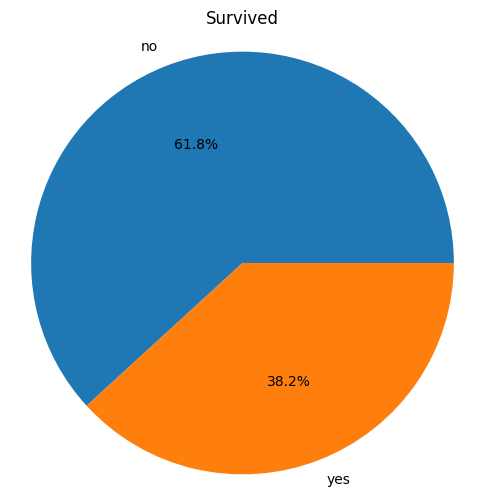

In [19]:
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.pie(
    autopct="%1.1f%%", y="count", figsize=[6, 6], title="Survived", legend=False
)
plot.set_ylabel("")
plot.axis("equal")


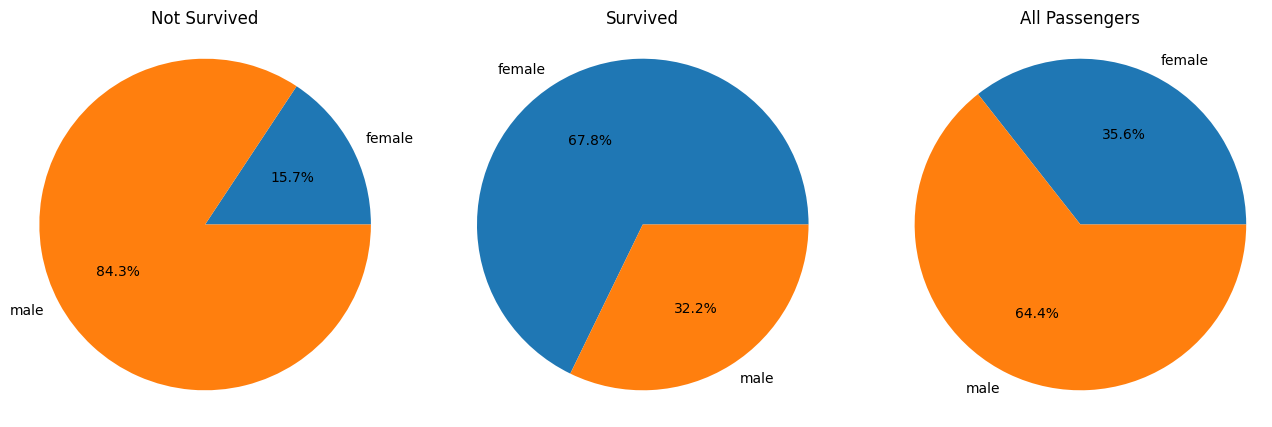

In [20]:
plots = (
    titanic_sex.div(titanic_sex["All"], axis=0)
    .transpose()[0:2]
    .plot.pie(
        figsize=[16, 5],
        subplots=True,
        legend=False,
        autopct="%1.1f%%",
        title=["Not Survived", "Survived", "All Passengers"],
    )
)
for plot in plots:
    plot.set_ylabel("")
    plot.axis("equal")


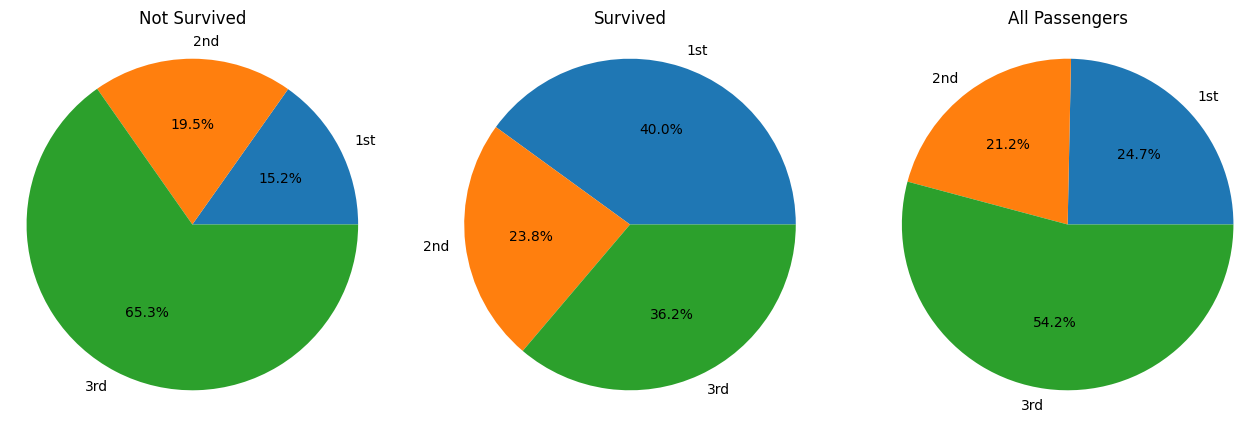

In [21]:
plots = (
    titanic_class.div(titanic_class["All"], axis=0)
    .transpose()[0:3]
    .plot.pie(
        title=["Not Survived", "Survived", "All Passengers"],
        figsize=[16, 5],
        subplots=True,
        legend=False,
        autopct="%1.1f%%",
    )
)
for plot in plots:
    plot.set_ylabel("")
    plot.axis("equal")


(-1.099999899368262,
 1.0999999952080124,
 -1.0999991932590523,
 1.0999997779744024)

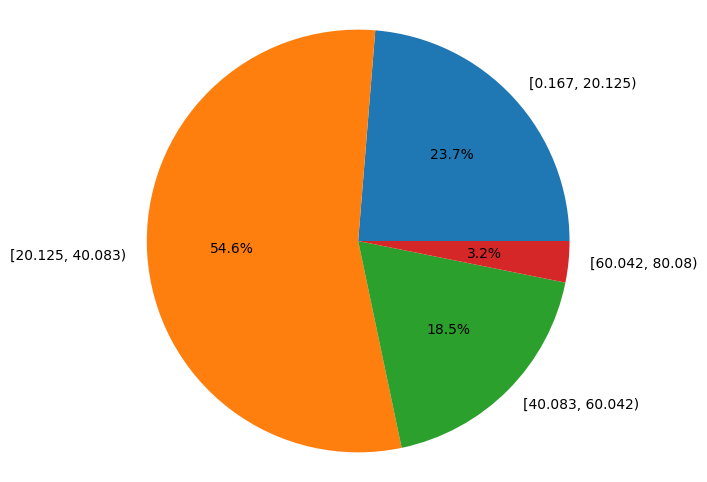

In [22]:
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=4, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(figsize=[6, 6], legend=False, autopct="%1.1f%%")
plt.ylabel("")
plt.axis("equal")


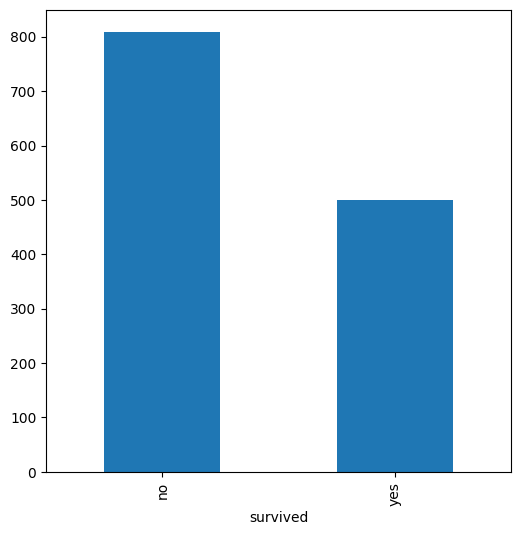

In [23]:
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.bar(
    y="count", figsize=[6, 6], legend=False
)


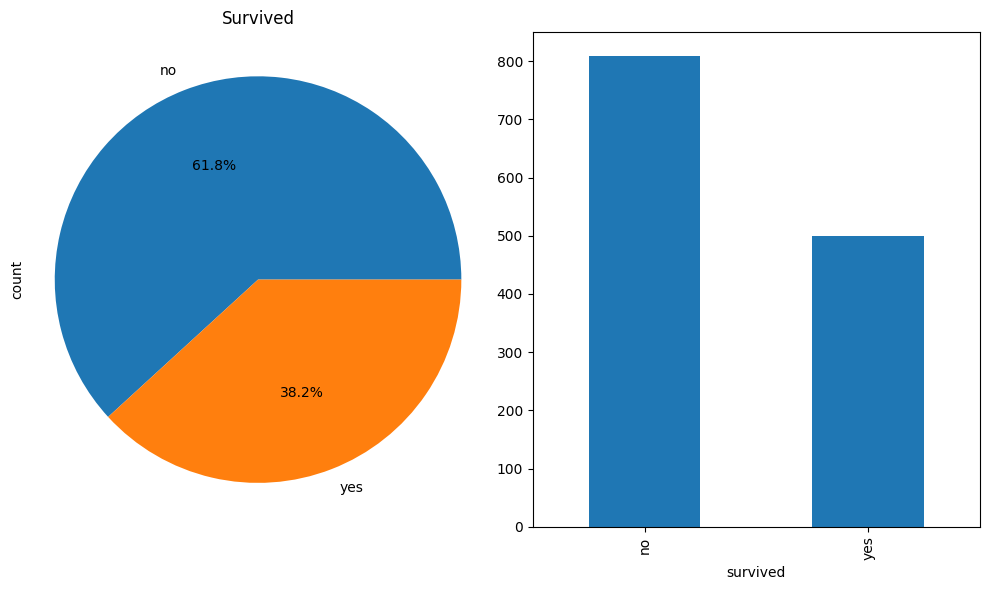

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plot = pd.crosstab(index=titanic["survived"], columns="count").plot.pie(
    ax=axes[0], autopct="%1.1f%%", y="count", title="Survived", legend=False
)
plot.axis("equal")
pd.crosstab(index=titanic["survived"], columns="count").plot.bar(
    ax=axes[1], y="count", legend=False
)
fig.tight_layout()


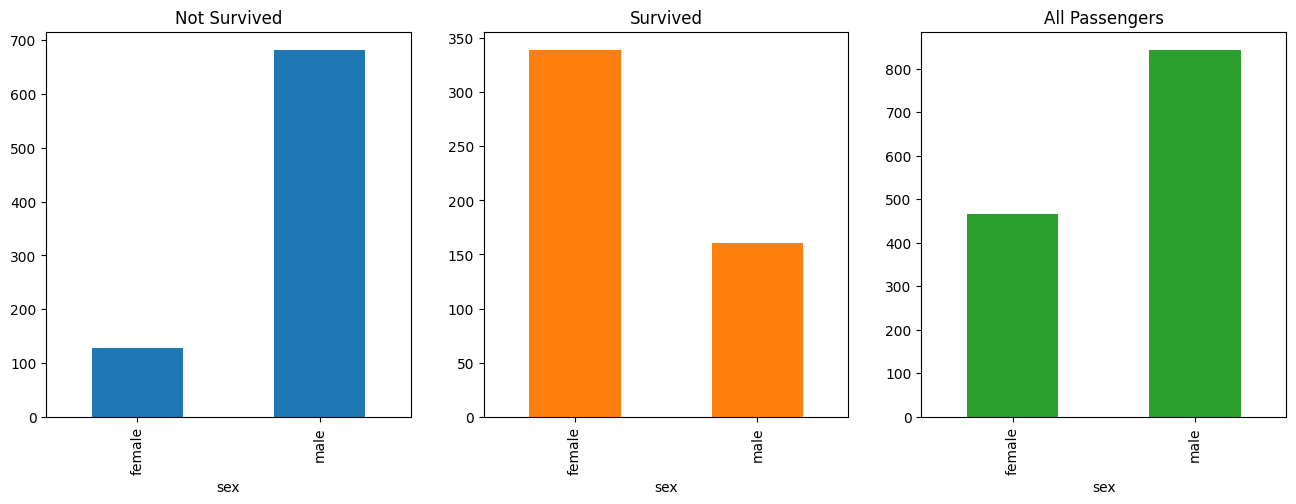

In [25]:
plots = titanic_sex.transpose()[0:2].plot.bar(
    figsize=[16, 5],
    subplots=True,
    legend=False,
    title=["Not Survived", "Survived", "All Passengers"],
    layout=(1, 3),
)


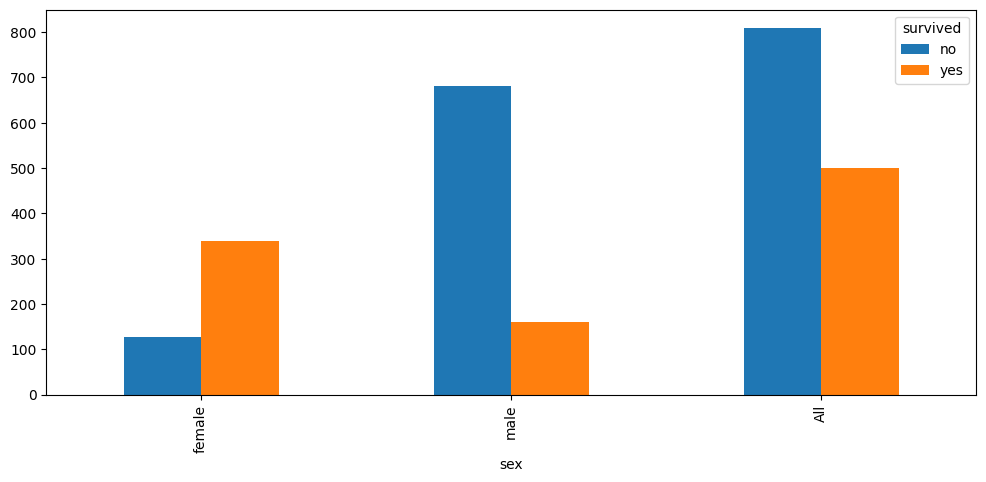

In [26]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[12, 5])


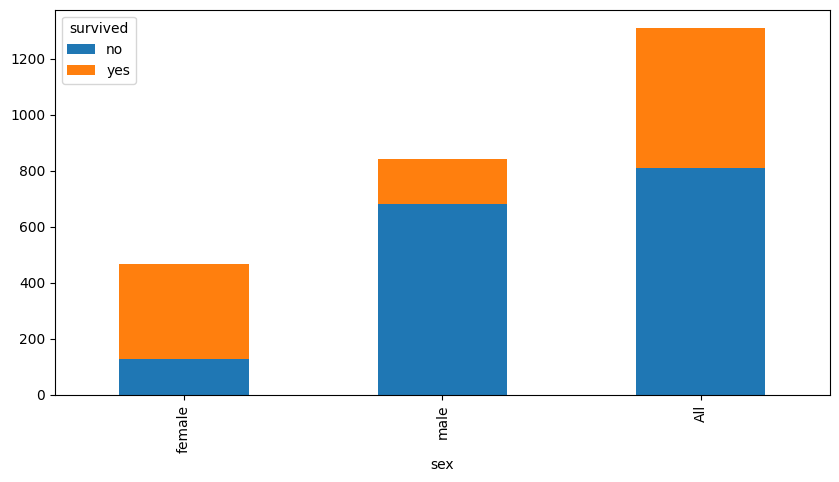

In [27]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[10, 5], stacked=True)


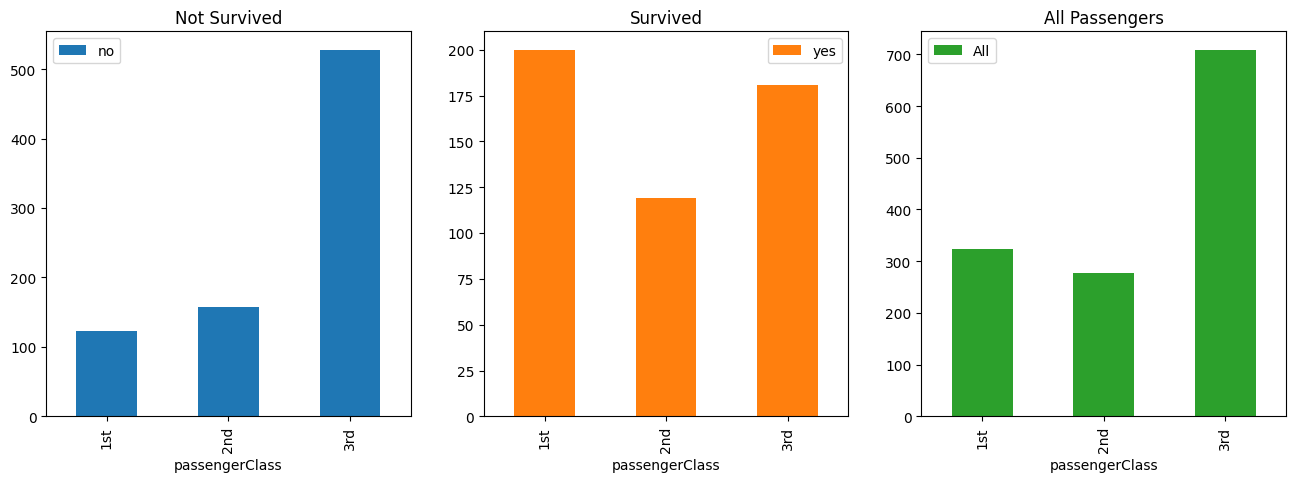

In [28]:
plots = titanic_class.transpose()[0:3].plot.bar(
    title=["Not Survived", "Survived", "All Passengers"],
    figsize=[16, 5],
    subplots=True,
    layout=(1, 3),
)


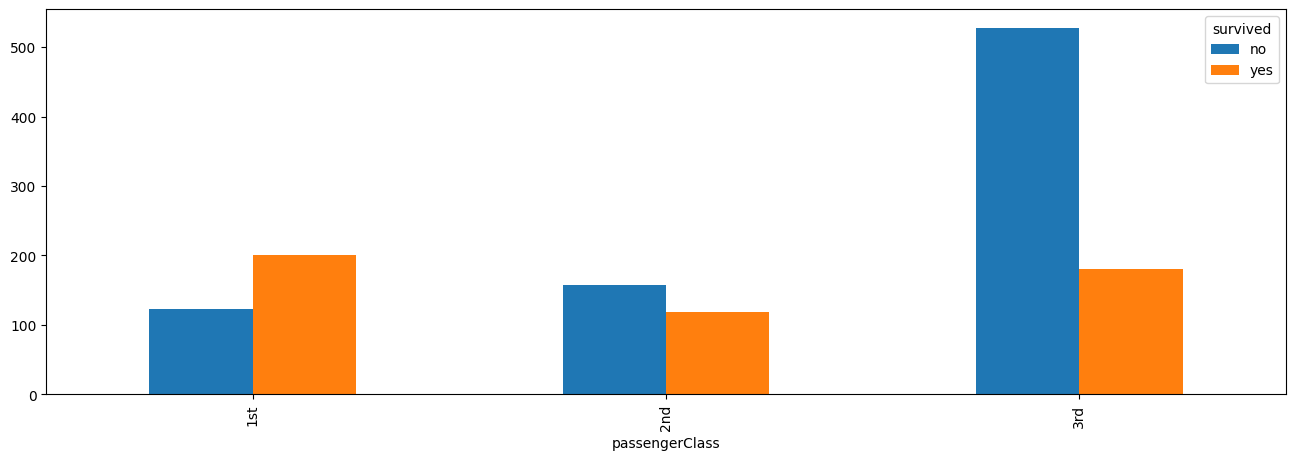

In [29]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[16, 5])


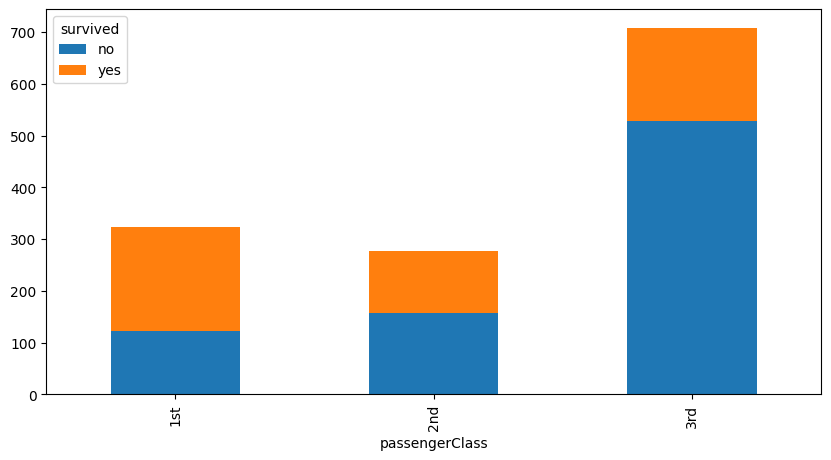

In [30]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[10, 5], stacked=True)


<AxesSubplot: >

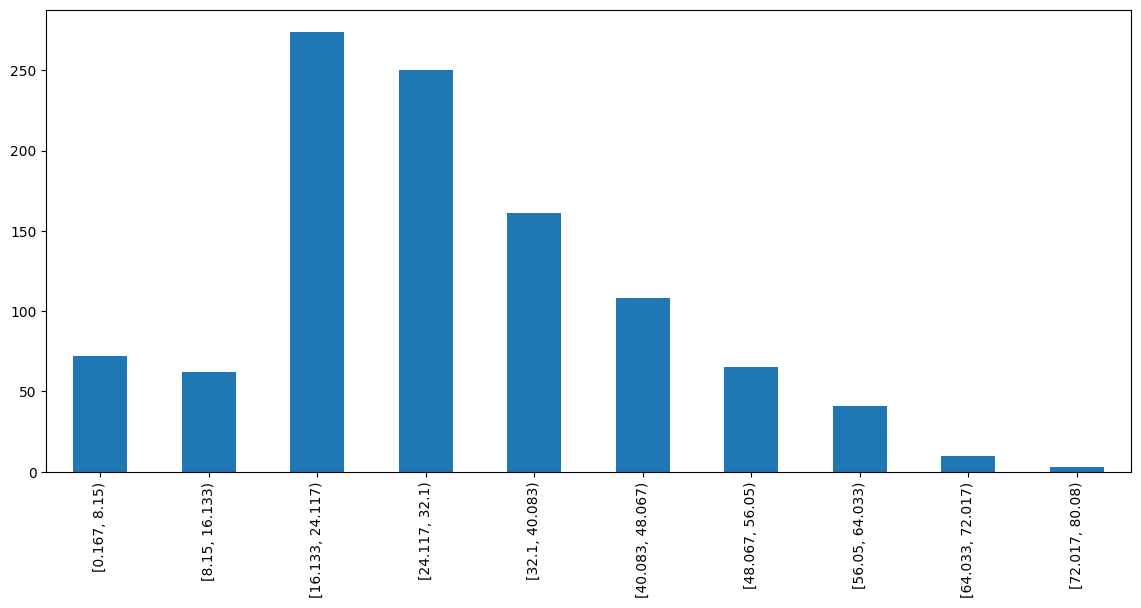

In [31]:
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=10, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(figsize=[14, 6])


(-1.099999899368262,
 1.0999999952080124,
 -1.0999991932590523,
 1.0999997779744024)

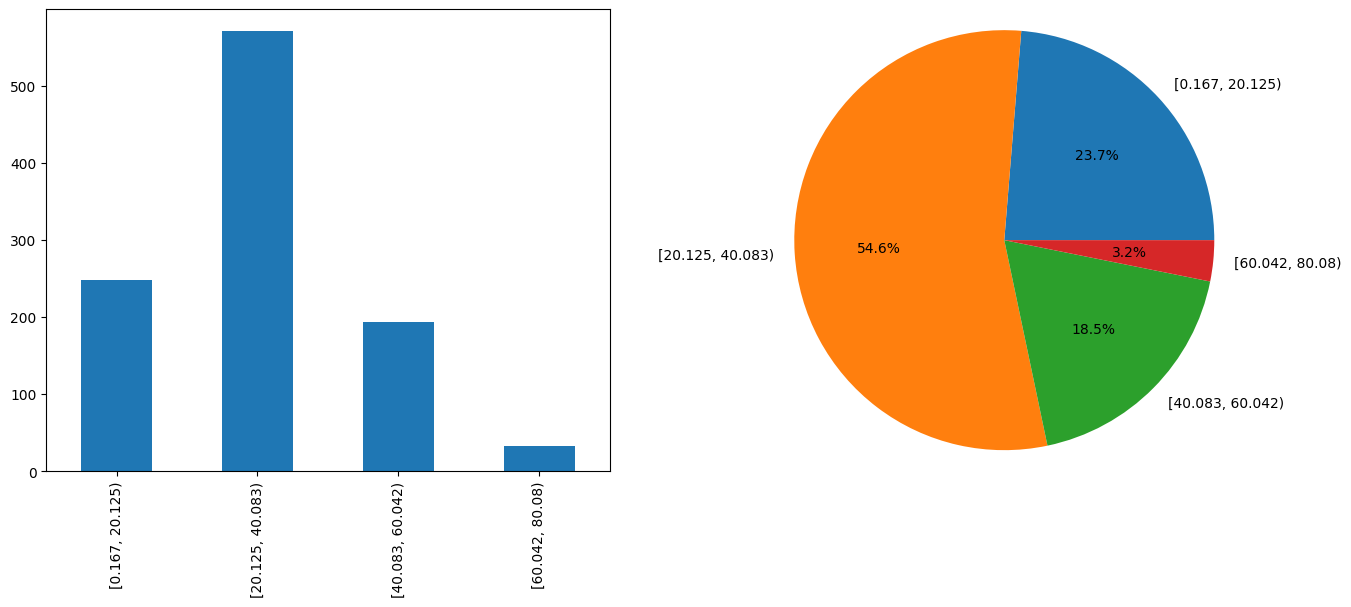

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
n_bins = 4
s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(ax=axes[0])

s = titanic["age"].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(ax=axes[1], legend=False, autopct="%1.1f%%")
plt.ylabel("")
plt.axis("equal")
